<a href="https://colab.research.google.com/github/ArseneGiriteka/PyTorch_Deep_Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another there can be multiple things as the options).

  ## 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(x), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of x: {x[:5]}")
print(f"First 5 samples of Y: {y[:5]}")

First 5 samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y: [1 1 1 1 0]


In [5]:
# Make a dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": x[:, 0], "X2": x[:, 1], "label": y})

circles.head(20)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


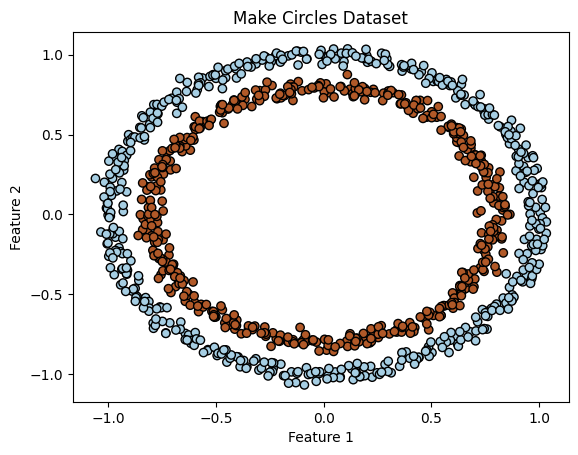

In [6]:
import matplotlib.pyplot as plt

# Plot the circles
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Make Circles Dataset")
plt.show()

 **Note**: The data we ara working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Checking input and output shapes

In [7]:
x.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first expamle of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"Values for onr sample of x: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for onr sample of x: {x_sample.shape} and the same for y: {y_sample.shape}")

Values for onr sample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for onr sample of x: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [9]:
import torch
torch.__version__

'2.6.0+cu124'

In [10]:
# Turn data into tensors
X = torch.from_numpy(x).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
type(X), type(Y), X.dtype, Y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [12]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and an optimizer
4. Create a training and test loop

In [14]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`).
2. Creates 2 `nn.Linear()` layers that are cable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model.
4. Instatiate an instance of our model class and send it to target `device`.

In [15]:
# 1. Make a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # 2. Create two nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and output 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and output only 1 feature

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x) -> int:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 ===> output

# 4. Let's instatiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
device, next(model_0.parameters()).device

('cpu', device(type='cpu'))

In [17]:
# Let's replicate model_0 just above
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5418, -0.5490],
                      [-0.2770, -0.6139],
                      [ 0.4470,  0.3608],
                      [ 0.5845, -0.0016],
                      [ 0.0747, -0.0137]])),
             ('0.bias', tensor([0.0013, 0.2604, 0.0978, 0.6869, 0.4856])),
             ('1.weight',
              tensor([[ 0.3540, -0.1725, -0.0363,  0.2410,  0.3079]])),
             ('1.bias', tensor([-0.3543]))])

In [19]:
# Let's make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 20 predictions:\n{untrained_preds[:20]}")
print(f"\nFirst 20  labels:\n{Y_test[:20]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 20 predictions:
tensor([[-0.1611],
        [-0.1891],
        [-0.0564],
        [-0.1908],
        [-0.0068],
        [-0.0243],
        [-0.1425],
        [-0.1038],
        [-0.0586],
        [-0.1904],
        [-0.1725],
        [-0.1649],
        [-0.1226],
        [-0.0284],
        [-0.0644],
        [-0.0766],
        [-0.1583],
        [-0.1655],
        [-0.1463],
        [-0.1397]])

First 20  labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

- For Example for regression you might want MAE or MSE (mean absolute error or mean squared error).

- For classification you might want to use cross entropy or categorical cross entropy(cross entropy)

- For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`.

- `nn.BCELoss()` requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
- `nn.BCEWithLogitsLoss()` has a built-in sigmoid activation function

In [20]:
# Let's setup the loss function
loss_func = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [21]:
# Let's calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_func(Y_true, Y_pred):
  return torch.eq(Y_true, Y_pred).sum().item() / len(Y_pred) * 100

## 3. Train the model

To train our model, we're going to need to build a traing loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero gradient
4. Loss backword (backpropagation)
5. Optimizer step

### 3.1 Going from raw logits -> predictrion probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [22]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1611],
        [-0.1891],
        [-0.0564],
        [-0.1908],
        [-0.0068]])

In [23]:
# Let's use a sigmod function on our model logits to turn them into prediction probabilities
Y_pred_probs = torch.sigmoid(y_logits)
Y_pred_probs

tensor([[0.4598],
        [0.4529],
        [0.4859],
        [0.4524],
        [0.4983]])

For our prediction probability values, we need to perform a range-style rounding on them:

- `Y_pred_probs` >= 0.5, `y=1` (class 1).
- `Y_pred_probs` < 0.5, `y=0` (class 0).

In [24]:
# Find the predicticted labels
Y_preds = torch.round(Y_pred_probs)

# All step shown in one()
Y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equity
print(torch.eq(Y_preds.squeeze(), Y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### 3.2 Build a training model


In [25]:
# Setting the number of epocs
epochs = 1000


# Put data to device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


# Build training and evaluation loop
for epoch in range(epochs):
  ### Traing
  model_0.train()

  # 1. Forward pass
  Y_logits = model_0(X_train).squeeze()
  Y_preds = torch.round(torch.sigmoid(Y_logits))

  # 2. Calculate loss/accuracy
  # nn.BCELoss expects predictionprobabilities as input
  loss = loss_func(Y_logits, Y_train) # But here we used nn.BCEWithLogitsLoss wich expects raw logits as input

  acc = accuracy_func(Y_true=Y_train, Y_pred=Y_preds)


  # 3. Optimizer zero grad
  optimizer.zero_grad()


  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_func(test_logits, Y_test)
    test_acc = accuracy_func(Y_true=Y_test, Y_pred=test_preds)

    # 3. Print out what's happenning
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69519, Acc: 41.00% | Test loss: 0.69256, Test acc: 43.50%
Epoch: 10 | Loss: 0.69436, Acc: 46.38% | Test loss: 0.69231, Test acc: 49.50%
Epoch: 20 | Loss: 0.69397, Acc: 47.62% | Test loss: 0.69241, Test acc: 51.00%
Epoch: 30 | Loss: 0.69376, Acc: 47.88% | Test loss: 0.69260, Test acc: 51.00%
Epoch: 40 | Loss: 0.69362, Acc: 49.25% | Test loss: 0.69281, Test acc: 49.00%
Epoch: 50 | Loss: 0.69352, Acc: 49.50% | Test loss: 0.69301, Test acc: 46.50%
Epoch: 60 | Loss: 0.69345, Acc: 50.12% | Test loss: 0.69319, Test acc: 45.50%
Epoch: 70 | Loss: 0.69339, Acc: 50.62% | Test loss: 0.69335, Test acc: 45.00%
Epoch: 80 | Loss: 0.69334, Acc: 49.75% | Test loss: 0.69349, Test acc: 49.00%
Epoch: 90 | Loss: 0.69329, Acc: 49.25% | Test loss: 0.69361, Test acc: 51.00%
Epoch: 100 | Loss: 0.69326, Acc: 49.25% | Test loss: 0.69371, Test acc: 50.00%
Epoch: 110 | Loss: 0.69323, Acc: 49.25% | Test loss: 0.69380, Test acc: 49.50%
Epoch: 120 | Loss: 0.69320, Acc: 49.88% | Test loss: 0.69388, T

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make the visual (Visualize, Visualize, Visualize).

To do so, we're going to import a function called `plot_decision_boundary()`.

In [26]:
import requests
from pathlib import Path

# Download helper functions from my github (if it's not downloaded yet)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists !")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/ArseneGiriteka/pytorch-deep-learning_daniel_bourkie-s-course/main/helper_functions.py")
  print(request.status_code)
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

import importlib
import helper_functions
importlib.reload(helper_functions)  # Reloads the module

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py
200


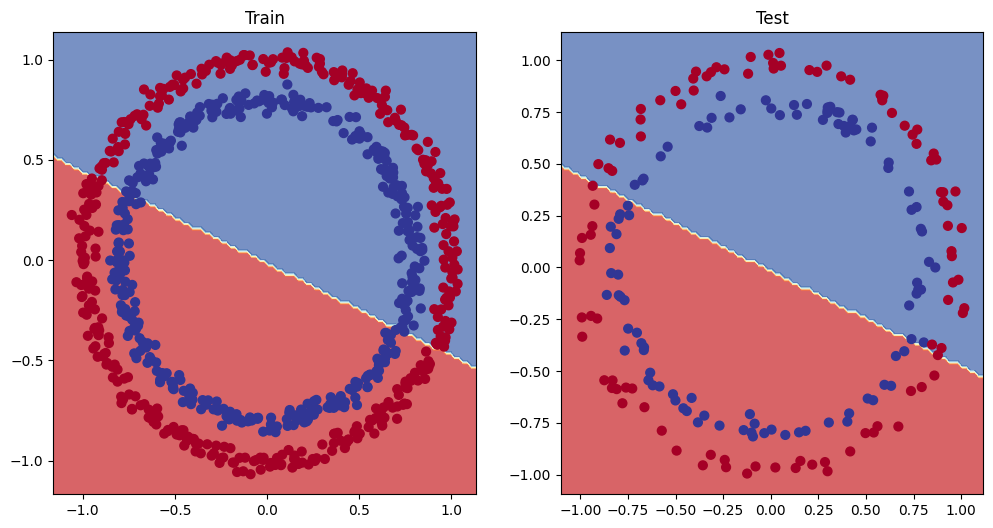

In [27]:
# Let's plot decision boundary of model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, Y_test)

## 5. Improve a model (From a model perspective)

- Add more layers - give the model more chances to learn about patterns in the data
- Add more hidden hidden units - go from 5 to 10 hidden units.
- Fit for longer.
- Changing activation functions.
- Change the learning rate.
- Change the loss function.

These options are all from model's perspective beacause the deal directictly with the model rather than the  data.

And because these options are all value we can change **hyperparameters**.

Let's improve our model by:
* Adding more hidden units: 5->10
* Increasing the number of layers: 2-> 3
* Increasing the number of epochs

In [28]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [38]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [30]:
# Creating a loss function
loss_func = nn.BCEWithLogitsLoss()


# Creating an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [31]:
# Writing a traing and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Train for longer
epocs = 1000

# Put data on the target device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  Y_logits = model_1(X_train).squeeze()
  Y_preds = torch.round(torch.sigmoid(Y_logits)) # logits -> pred_probabilities - prediction labels

  # 2. Calculate the loss/acc
  loss = loss_func(Y_logits, Y_train)
  acc = accuracy_func(Y_true=Y_train, Y_pred=Y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss/acc
    test_loss = loss_func(test_logits, Y_test)
    test_acc = accuracy_func(Y_true=Y_test, Y_pred=test_preds)

  # print out metrics
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.5f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}%")


Epoch: 0 | Loss: 0.70993, Acc: 50.00000% | Test loss: 0.70965, Test acc: 50.00000%
Epoch: 100 | Loss: 0.69681, Acc: 50.00000% | Test loss: 0.69731, Test acc: 50.00000%
Epoch: 200 | Loss: 0.69428, Acc: 46.00000% | Test loss: 0.69509, Test acc: 46.00000%
Epoch: 300 | Loss: 0.69370, Acc: 49.50000% | Test loss: 0.69465, Test acc: 45.00000%
Epoch: 400 | Loss: 0.69352, Acc: 49.12500% | Test loss: 0.69452, Test acc: 49.50000%
Epoch: 500 | Loss: 0.69341, Acc: 49.25000% | Test loss: 0.69446, Test acc: 49.50000%
Epoch: 600 | Loss: 0.69334, Acc: 49.37500% | Test loss: 0.69441, Test acc: 50.50000%
Epoch: 700 | Loss: 0.69328, Acc: 49.75000% | Test loss: 0.69437, Test acc: 49.50000%
Epoch: 800 | Loss: 0.69324, Acc: 49.75000% | Test loss: 0.69434, Test acc: 48.50000%
Epoch: 900 | Loss: 0.69320, Acc: 50.62500% | Test loss: 0.69432, Test acc: 50.00000%


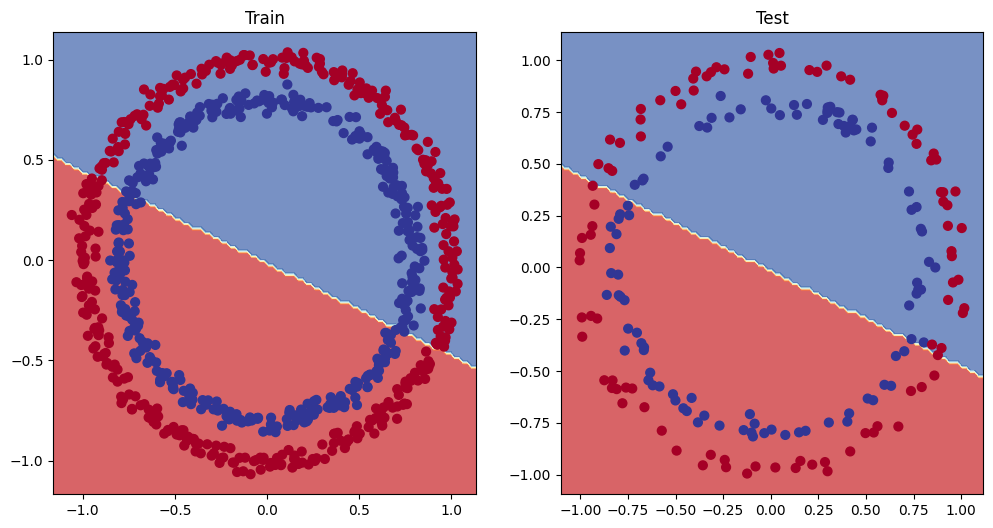

In [32]:
# Let's plot decision boundary of model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, Y_test)

### 5.1 Prepare data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to testy out a smaller problem.

In [33]:
# Create some data
weight = 0.7
bias= 0.3
start = 0
end = 1
step = 0.01


# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
Y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], Y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [34]:
# Create train and test data splits
train_split = int(0.8 * len(X_regression))
X_train_regression, Y_train_regression = X_regression[:train_split], Y_regression[:train_split]
X_test_regression, Y_test_regression = X_regression[train_split:], Y_regression[train_split:]

# Checking the length of each
len(X_train_regression), len(Y_train_regression), len(X_test_regression), len(Y_test_regression)

(80, 80, 20, 20)

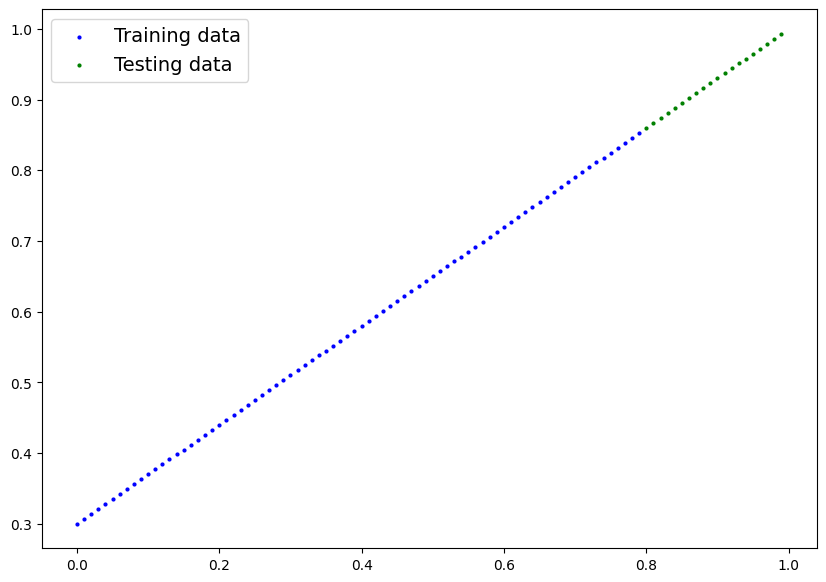

In [35]:
plot_predictions(train_data=X_train_regression, train_labels=Y_train_regression, test_data=X_test_regression, test_labels=Y_test_regression)

In [36]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a line

In [40]:
# Same architecture as model_1 (but using nn.Sequetael())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [ ]:
# Let's train model_2
